## Unballanced dataset Preprocessing

In [119]:
# Importing necessary libraries

import numpy as np
import pandas as pd
pd.set_option("display.max_columns", None)
pd.set_option('float_format', '{:f}'.format)

import matplotlib.pyplot as plt
import matplotlib.colors as colors  
import matplotlib.patches as mpatches
%matplotlib inline
import seaborn as sns

import time

import warnings
warnings.filterwarnings('ignore')

In [120]:
#pip install xgboost

In [121]:
df = pd.read_csv('datasets/data1_unballanced_raw.csv')

In [122]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.000000,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.620000,0
1,0.000000,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.690000,0
2,1.000000,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.660000,0
3,1.000000,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.500000,0
4,2.000000,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.990000,0


In [123]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000
mean,94813.859575,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,-0.000000,88.349619,0.001727
std,47488.145955,1.958696,1.651309,1.516255,1.415869,1.380247,1.332271,1.237094,1.194353,1.098632,1.088850,1.020713,0.999201,0.995274,0.958596,0.915316,0.876253,0.849337,0.838176,0.814041,0.770925,0.734524,0.725702,0.624460,0.605647,0.521278,0.482227,0.403632,0.330083,250.120109,0.041527
min,0.000000,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-43.557242,-73.216718,-13.434066,-24.588262,-4.797473,-18.683715,-5.791881,-19.214325,-4.498945,-14.129855,-25.162799,-9.498746,-7.213527,-54.497720,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-15.430084,0.000000,0.000000
25%,54201.500000,-0.920373,-0.598550,-0.890365,-0.848640,-0.691597,-0.768296,-0.554076,-0.208630,-0.643098,-0.535426,-0.762494,-0.405571,-0.648539,-0.425574,-0.582884,-0.468037,-0.483748,-0.498850,-0.456299,-0.211721,-0.228395,-0.542350,-0.161846,-0.354586,-0.317145,-0.326984,-0.070840,-0.052960,5.600000,0.000000
50%,84692.000000,0.018109,0.065486,0.179846,-0.019847,-0.054336,-0.274187,0.040103,0.022358,-0.051429,-0.092917,-0.032757,0.140033,-0.013568,0.050601,0.048072,0.066413,-0.065676,-0.003636,0.003735,-0.062481,-0.029450,0.006782,-0.011193,0.040976,0.016594,-0.052139,0.001342,0.011244,22.000000,0.000000
75%,139320.500000,1.315642,0.803724,1.027196,0.743341,0.611926,0.398565,0.570436,0.327346,0.597139,0.453923,0.739593,0.618238,0.662505,0.493150,0.648821,0.523296,0.399675,0.500807,0.458949,0.133041,0.186377,0.528554,0.147642,0.439527,0.350716,0.240952,0.091045,0.078280,77.165000,0.000000
max,172792.000000,2.454930,22.057729,9.382558,16.875344,34.801666,73.301626,120.589494,20.007208,15.594995,23.745136,12.018913,7.848392,7.126883,10.526766,8.877742,17.315112,9.253526,5.041069,5.591971,39.420904,27.202839,10.503090,22.528412,4.584549,7.519589,3.517346,31.612198,33.847808,25691.160000,1.000000


In [124]:
# Checking for the missing value present in each columns
total = df.isnull().sum().sort_values()
total

Time      0
V28       0
V27       0
V26       0
V25       0
V24       0
V23       0
V22       0
V21       0
V20       0
V19       0
V18       0
V17       0
V16       0
Amount    0
V15       0
V13       0
V12       0
V11       0
V10       0
V9        0
V8        0
V7        0
V6        0
V5        0
V4        0
V3        0
V2        0
V1        0
V14       0
Class     0
dtype: int64

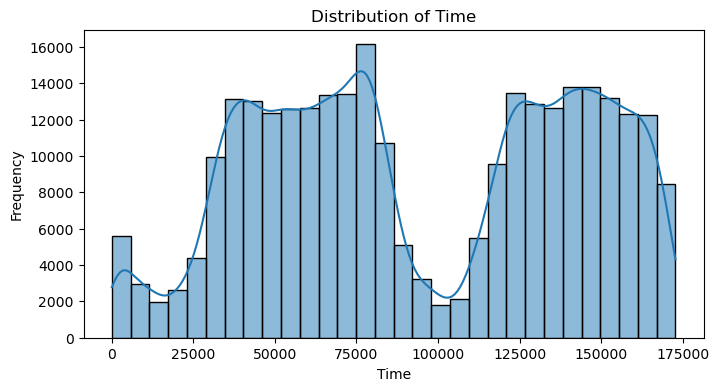

In [127]:
# Visualizing unanonymized columns

# Distribution of Time
plt.figure(figsize=(8, 4))
sns.histplot(df['Time'], bins=30, kde=True)
plt.title('Distribution of Time')
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.show()

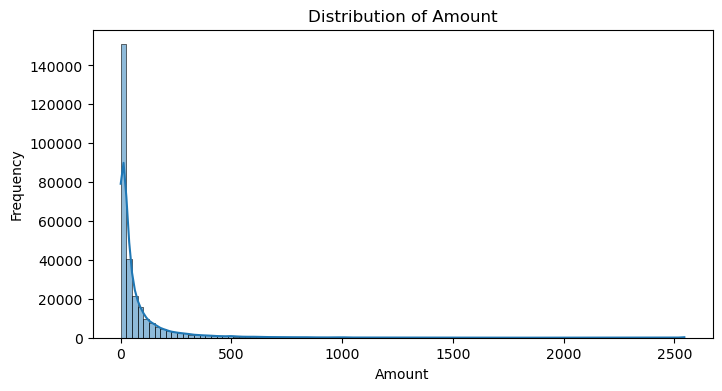

In [128]:
# Distribution of Time
plt.figure(figsize=(8, 4))
sns.histplot(df['Amount'], bins=100, kde=True)
plt.title('Distribution of Amount')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.show()

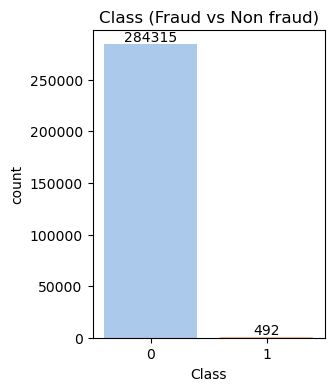

In [129]:
plt.figure(figsize=(3,4))
plt.title('Class (Fraud vs Non fraud)')
ax = sns.countplot(x='Class',data=df,palette="pastel")
for i in ax.containers:
    ax.bar_label(i,)

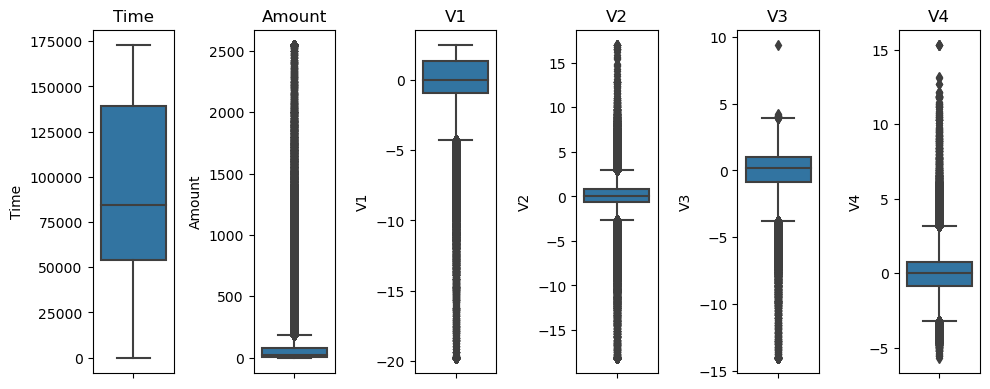

In [130]:
# Box plots
import seaborn as sns
import matplotlib.pyplot as plt

columns_to_plot = ['Time','Amount','V1','V2','V3','V4']
n_cols = len(columns_to_plot)

fig, axes = plt.subplots(1, n_cols, figsize=(10, 4), sharey=False)

for i, col in enumerate(columns_to_plot):
    sns.boxplot(y=df[col], ax=axes[i])
    axes[i].set_title(f'{col.capitalize()}')

plt.tight_layout()
plt.show()

### Time is very equally distributed and symetrical. Amount has a lot of small values untill around 100, then Very many outliers with higher values. V1 - X seem to have different discributions

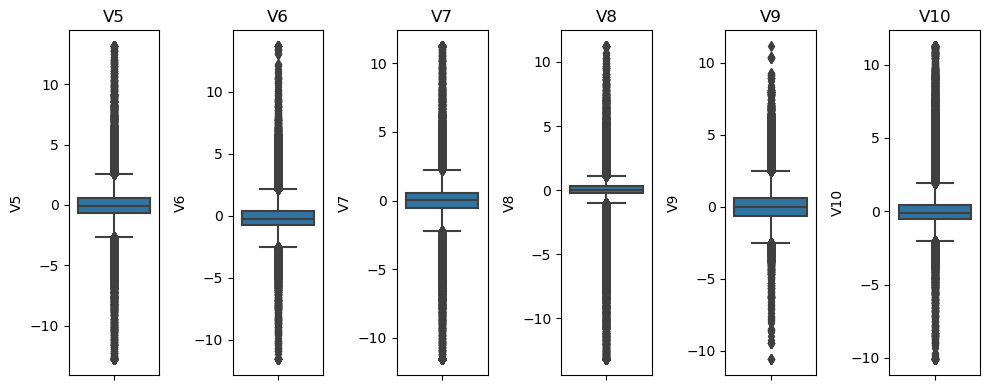

In [131]:
# Box plots
import seaborn as sns
import matplotlib.pyplot as plt

columns_to_plot = ['V5','V6','V7','V8','V9','V10',]
n_cols = len(columns_to_plot)

fig, axes = plt.subplots(1, n_cols, figsize=(10, 4), sharey=False)

for i, col in enumerate(columns_to_plot):
    sns.boxplot(y=df[col], ax=axes[i])
    axes[i].set_title(f'{col.capitalize()}')

plt.tight_layout()
plt.show()

### V-X seem to have different discributions. All centered around 0.


## Outlier handling

In [126]:
# Handling outliers
column_list = (list(df.columns))
# Remove specific columns
columns_to_remove = ['Time', 'Class']
column_list = [item for item in column_list if item not in columns_to_remove]

column_list

def detect_and_handle_outliers(df, column):
    Q1 = df[column].quantile(0.01)
    Q3 = df[column].quantile(0.99)
    IQR = Q3 - Q1
    lower_fence = Q1 - 1.5 * IQR
    upper_fence = Q3 + 1.5 * IQR

    # Detect outliers
    outliers = df[(df[column] < lower_fence) | (df[column] > upper_fence)]
    print(f"Number of outliers in {column}: {len(outliers)}")

    # Cap and floor values
    df[column] = df[column].clip(lower=lower_fence, upper=upper_fence)

    return df

# Outliers are capped and floored
for col in column_list:
    df = detect_and_handle_outliers(df, col)

Number of outliers in V1: 164
Number of outliers in V2: 188
Number of outliers in V3: 120
Number of outliers in V4: 3
Number of outliers in V5: 215
Number of outliers in V6: 55
Number of outliers in V7: 316
Number of outliers in V8: 308
Number of outliers in V9: 5
Number of outliers in V10: 205
Number of outliers in V11: 33
Number of outliers in V12: 115
Number of outliers in V13: 0
Number of outliers in V14: 128
Number of outliers in V15: 1
Number of outliers in V16: 80
Number of outliers in V17: 249
Number of outliers in V18: 14
Number of outliers in V19: 0
Number of outliers in V20: 303
Number of outliers in V21: 546
Number of outliers in V22: 29
Number of outliers in V23: 510
Number of outliers in V24: 0
Number of outliers in V25: 19
Number of outliers in V26: 0
Number of outliers in V27: 271
Number of outliers in V28: 426
Number of outliers in Amount: 423


In [132]:
classes=df['Class'].value_counts()
normal_share=classes[0]/df['Class'].count()*100
fraud_share=classes[1]/df['Class'].count()*100

print(" Normal_share=",normal_share,"\n","Fraud_share=",fraud_share)
print("==============================================")

imbalance= (fraud_share/normal_share)*100
print(' Imbalance Percentage = ' + str(imbalance))

 Normal_share= 99.82725143693798 
 Fraud_share= 0.1727485630620034
 Imbalance Percentage = 0.173047500131896


In [133]:
# Creating sub dataframes

# amount of fraud classes 492 rows.
fraud_df = df.loc[df['Class'] == 1]
non_fraud_df = df.loc[df['Class'] == 0][:492]

fraud_df.head()

normal_distributed_df = pd.concat([fraud_df, non_fraud_df])

new_df = normal_distributed_df.sample(frac=1, random_state=2)

new_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
149577,91502.000000,0.007379,2.365183,-2.600287,1.111602,3.276441,-1.776141,2.114531,-0.830084,0.900490,-3.376177,2.056812,-3.984257,1.021968,-5.967905,-1.151608,1.679740,5.586115,2.789131,-2.241075,-0.006388,-0.563944,-0.902100,-0.404382,-0.012944,0.589836,-0.734449,-0.447529,-0.362375,1.000000,1
48,35.000000,1.386397,-0.794209,0.778224,-0.864708,-1.064132,0.351296,-1.191455,0.052686,-0.304404,0.576517,-1.631112,0.042560,2.047898,-0.739338,1.456222,-0.272050,-0.932007,1.926532,-0.659939,-0.273033,-0.228727,-0.123522,-0.131025,-0.929668,0.181379,1.194928,0.000531,0.019911,30.900000,0
314,227.000000,-1.465381,1.382172,1.019790,0.250367,1.011414,-1.281807,1.186866,-0.312608,-0.701503,-1.067341,0.205773,0.315038,1.297579,-1.951782,0.410606,0.622671,0.534445,0.485837,-1.096382,0.004784,-0.038147,0.083481,-0.266017,0.270833,0.754353,-0.491529,-0.689819,-0.329374,1.000000,0
143334,85285.000000,-7.030308,3.421991,-9.525072,5.270891,-4.024630,-2.865682,-6.989195,3.791551,-4.622730,-8.409665,6.309044,-8.576761,0.246747,-10.224858,-0.364265,-5.452495,-6.809798,-3.563585,0.876019,0.545698,1.103398,-0.541855,0.036943,-0.355519,0.353634,1.042458,1.359516,-0.272188,0.000000,1
161,103.000000,-1.409009,0.563493,3.350717,-0.436893,-1.123467,0.256345,-0.253390,-0.795814,1.421954,-0.681590,-0.680796,1.398463,1.114929,-1.894595,-2.189147,-0.640207,0.334833,-0.835912,-0.070620,-0.028601,0.665585,0.170281,-0.231557,1.067220,0.279906,0.988255,-0.105954,-0.073779,23.270000,0


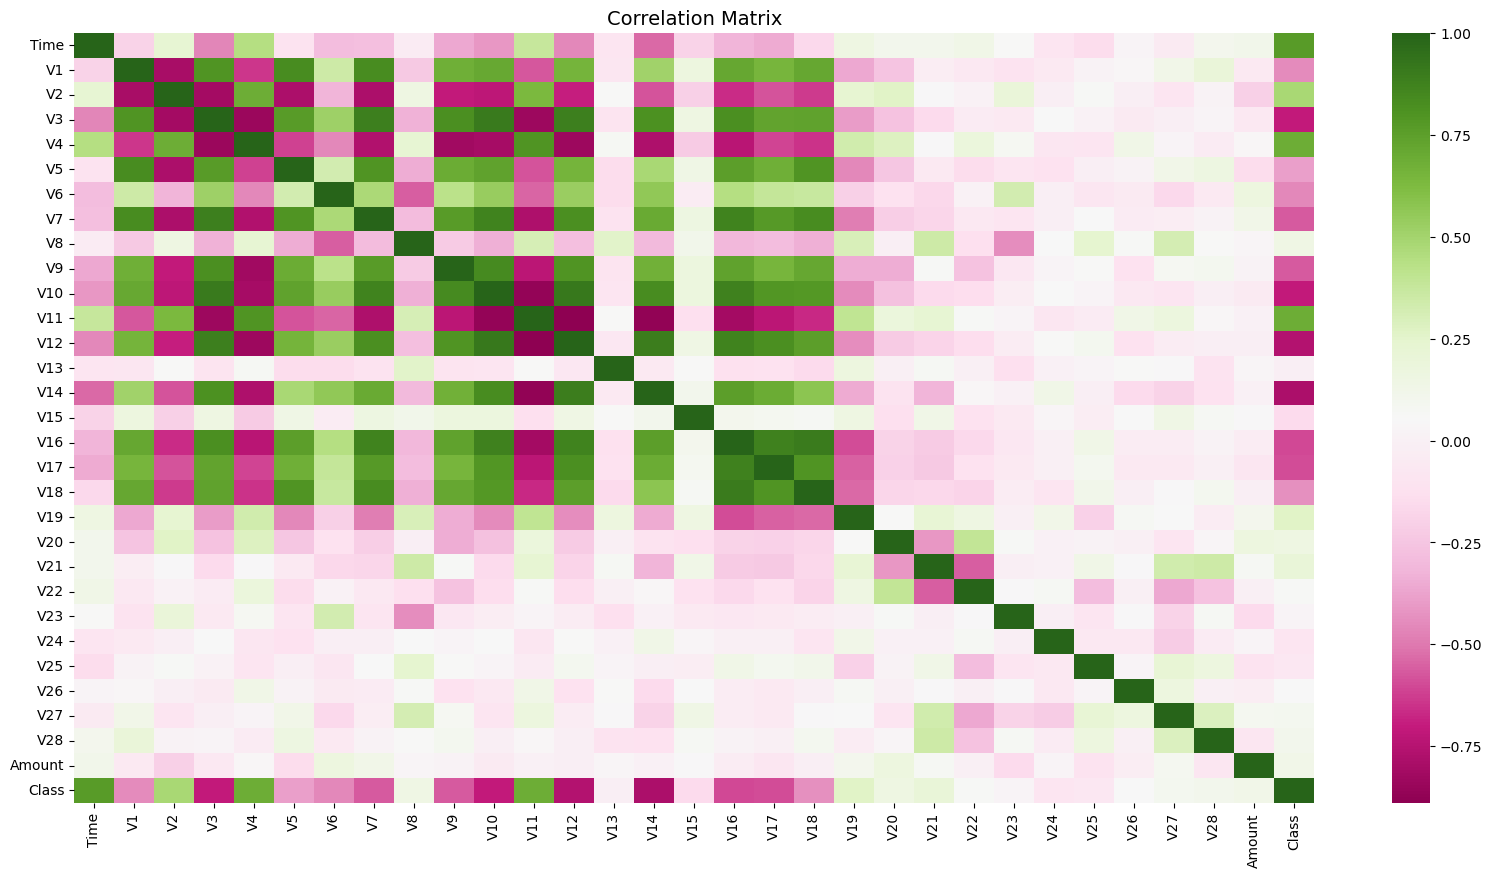

In [134]:
# Correlation matrix

f, ax2 = plt.subplots(1, 1, figsize=(20, 10))

sub_sample_corr = new_df.corr()

sns.heatmap(sub_sample_corr, cmap='PiYG', annot_kws={'size': 18}, ax=ax2)

ax2.set_title('Correlation Matrix', fontsize=14)

plt.show()

### There are a lot of variables corralated with Class. There is also quite a few variables (like V2-V1, V5-V2...) which are correlated between each other. Might want to consider removing such variables to reduce dimensions for the dataset.

## Scaling Amount and Time similarily as all other already scaled variables

In [135]:
from sklearn.preprocessing import StandardScaler, RobustScaler

std_scaler = StandardScaler()
rob_scaler = RobustScaler()

df['s_amount'] = rob_scaler.fit_transform(df['Amount'].values.reshape(-1,1))
df['s_time'] = rob_scaler.fit_transform(df['Time'].values.reshape(-1,1))

df.drop(['Time','Amount'], axis=1, inplace=True)

scaled_amount = df['s_amount']
scaled_time = df['s_time']

df.drop(['s_amount', 's_time'], axis=1, inplace=True)
df.insert(0, 's_amount', scaled_amount)
df.insert(1, 's_time', scaled_time)


df.head()

,s_amount,s_time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,1.783274,-0.994983,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,-0.269825,-0.994983,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,4.983721,-0.994972,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,1.418291,-0.994972,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,0.670579,-0.994960,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0


## Exporting preprocessed dataset

In [136]:
df.to_csv('datasets/data1_unballanced.csv', index=False)

In [13]:
# XGBoost, AdaBoost, Gradient Boosting Machine
# Conventional techniques